In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

In [172]:
data = "../DataSets/1632300362534233.csv"
df = pd.read_csv(data)

In [173]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [174]:
df.sample(5)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
1435,403,5,True,False,False,Andisheh,1.300000e+10,433333.33
1850,150,3,True,True,True,Punak,1.050000e+10,350000.00
1548,87,2,False,False,True,Pardis,8.100000e+08,27000.00
1091,95,2,False,True,True,Nawab,2.185000e+09,72833.33
2593,90,2,True,True,True,Ekhtiarieh,6.000000e+09,200000.00


In [175]:
df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [177]:
df.corr()

C:\Users\Fatemeh\AppData\Local\Temp\ipykernel_8068\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Room,Parking,Warehouse,Elevator,Price,Price(USD)
Room,1.000000,0.274804,0.129888,0.181707,0.567732,0.567732
Parking,0.274804,1.000000,0.432118,0.431292,0.190086,0.190086
Warehouse,0.129888,0.432118,1.000000,0.203174,0.109367,0.109367
Elevator,0.181707,0.431292,0.203174,1.000000,0.111446,0.111446
Price,0.567732,0.190086,0.109367,0.111446,1.000000,1.000000
Price(USD),0.567732,0.190086,0.109367,0.111446,1.000000,1.000000


In [178]:
df2 = df.copy()
df2['Area'] = pd.to_numeric(df2['Area'], errors = 'coerce')
df2.dropna(inplace = True)
df2.reset_index(drop = True, inplace = True)
print(f"Shape of dataset after drop NaN values: {df2.shape}")
print(f"Number of rows that deleted: {len(df) - len(df2)}")

Shape of dataset after drop NaN values: (3450, 8)
Number of rows that deleted: 29


In [179]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3450 entries, 0 to 3449
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3450 non-null   float64
 1   Room        3450 non-null   int64  
 2   Parking     3450 non-null   bool   
 3   Warehouse   3450 non-null   bool   
 4   Elevator    3450 non-null   bool   
 5   Address     3450 non-null   object 
 6   Price       3450 non-null   float64
 7   Price(USD)  3450 non-null   float64
dtypes: bool(3), float64(3), int64(1), object(1)
memory usage: 145.0+ KB


In [180]:
df2.isnull().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64

In [181]:
df3 = df2.drop(columns = ['Price(USD)'])
boolean_features = ['Parking','Warehouse','Elevator']
df3[boolean_features] = df3[boolean_features].astype('int64')

df3.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63.0,1,1,1,1,Shahran,1.850000e+09
1,60.0,1,1,1,1,Shahran,1.850000e+09
2,79.0,2,1,1,1,Pardis,5.500000e+08
3,95.0,2,1,1,1,Shahrake Qods,9.025000e+08
4,123.0,2,1,1,1,Shahrake Gharb,7.000000e+09


In [182]:
df3.corr()

C:\Users\Fatemeh\AppData\Local\Temp\ipykernel_8068\3136175663.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df3.corr()


,Area,Room,Parking,Warehouse,Elevator,Price
Area,1.000000,0.672955,0.197890,0.076161,0.051473,0.722611
Room,0.672955,1.000000,0.274425,0.129649,0.180380,0.567872
Parking,0.197890,0.274425,1.000000,0.431925,0.430213,0.191221
Warehouse,0.076161,0.129649,0.431925,1.000000,0.202708,0.109676
Elevator,0.051473,0.180380,0.430213,0.202708,1.000000,0.111745
Price,0.722611,0.567872,0.191221,0.109676,0.111745,1.000000


array([[<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Room'}>],
       [<Axes: title={'center': 'Parking'}>,
        <Axes: title={'center': 'Warehouse'}>],
       [<Axes: title={'center': 'Elevator'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

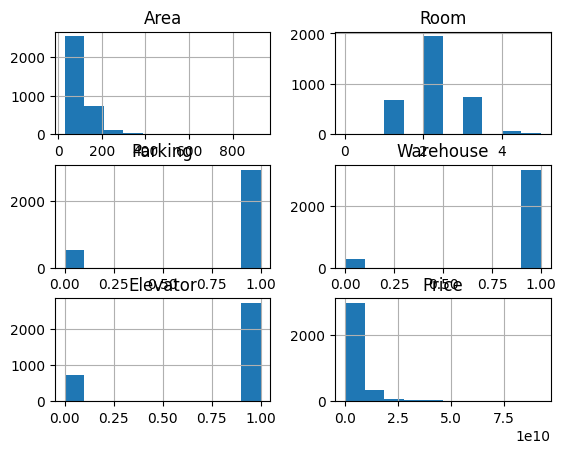

In [183]:
df3.hist()

In [184]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3450 entries, 0 to 3449
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       3450 non-null   float64
 1   Room       3450 non-null   int64  
 2   Parking    3450 non-null   int64  
 3   Warehouse  3450 non-null   int64  
 4   Elevator   3450 non-null   int64  
 5   Address    3450 non-null   object 
 6   Price      3450 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 188.8+ KB


In [185]:
df3.describe()

,Area,Room,Parking,Warehouse,Elevator,Price
count,3450.000000,3450.000000,3450.000000,3450.000000,3450.000000,3.450000e+03
mean,106.917391,2.081159,0.847536,0.915072,0.787536,5.375563e+09
std,69.550976,0.760216,0.359522,0.278814,0.409111,8.125918e+09
min,30.000000,0.000000,0.000000,0.000000,0.000000,3.600000e+06
25%,69.000000,2.000000,1.000000,1.000000,1.000000,1.419250e+09
50%,90.000000,2.000000,1.000000,1.000000,1.000000,2.900000e+09
75%,120.000000,2.000000,1.000000,1.000000,1.000000,6.000000e+09
max,929.000000,5.000000,1.000000,1.000000,1.000000,9.240000e+10


In [186]:
print(df3.skew())

Area         4.488354
Room         0.623884
Parking     -1.934446
Warehouse   -2.979139
Elevator    -1.406481
Price        4.766985
dtype: float64


C:\Users\Fatemeh\AppData\Local\Temp\ipykernel_8068\4168344255.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df3.skew())


In [187]:
def lower_upper(x):
    Q1 = np.percentile(x, 25)
    Q3 = np.percentile(x, 75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    return lower, upper

lower_area, upper_area = lower_upper(df3['Area'])
lower_price, upper_price = lower_upper(df3['Price'])

print(f"Lower limit for area: {lower_area:0.2f}")
print(f"Upper limit for area: {upper_area:0.2f}")
print(f"Lower limit for price: {lower_price:,}")
print(f"Upper limit for price: {upper_price:,}")

Lower limit for area: -7.50
Upper limit for area: 196.50
Lower limit for price: -5,451,875,000.0
Upper limit for price: 12,871,125,000.0


In [188]:
area_outliers = np.where(df3['Area'] > upper_area)
price_outliers = np.where(df3['Price'] > upper_price)
total_outliers = np.union1d(area_outliers, price_outliers)

print(f"Number of area outliers: {len(df3.iloc[area_outliers])}")
print(f"Number of price outliers: {len(df3.iloc[price_outliers])}")
print(f"Number of outliers: {len(df3.iloc[total_outliers])}")

Number of area outliers: 238
Number of price outliers: 309
Number of outliers: 361


In [189]:
df4 = df3.copy()
df4.drop(total_outliers, inplace = True)
df4.reset_index(drop = True, inplace = True)
print(f"Shape of new dataset: {df4.shape}")

Shape of new dataset: (3089, 7)


In [190]:
print(df4.skew())

Area         0.672756
Room         0.163801
Parking     -1.798618
Warehouse   -2.901748
Elevator    -1.393130
Price        1.285909
dtype: float64


C:\Users\Fatemeh\AppData\Local\Temp\ipykernel_8068\1018510483.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df4.skew())


In [191]:
addres_dummy = pd.get_dummies(df4['Address'])
housePrice = df4.merge(addres_dummy, left_index = True, right_index = True)
housePrice.drop(columns = 'Address', inplace = True)
housePrice.head(3)

,Area,Room,Parking,Warehouse,Elevator,Price,Abazar,Abbasabad,Abuzar,Afsarieh,...,Waterfall,West Ferdows Boulevard,West Pars,Yaftabad,Yakhchiabad,Yousef Abad,Zafar,Zaferanieh,Zargandeh,Zibadasht
0,63.0,1,1,1,1,1.850000e+09,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,60.0,1,1,1,1,1.850000e+09,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,79.0,2,1,1,1,5.500000e+08,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [192]:
df5 = housePrice[['Area', 'Room', 'Price']]
df5

,Area,Room,Price
0,63.0,1,1.850000e+09
1,60.0,1,1.850000e+09
2,79.0,2,5.500000e+08
3,95.0,2,9.025000e+08
4,123.0,2,7.000000e+09
...,...,...,...
3084,86.0,2,3.500000e+09
3085,83.0,2,6.800000e+09
3086,75.0,2,3.650000e+08
3087,105.0,2,5.600000e+09


In [193]:
mask = np.random.rand(len(df5)) < 0.8
train = housePrice[mask]
test = housePrice[~mask]

In [194]:
train_x = np.asanyarray(train[['Area']])
train_y = np.asanyarray(train[['Price']])

test_x = np.asanyarray(test[['Area']])
test_y = np.asanyarray(test[['Price']])

poly = PolynomialFeatures(degree= 2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[1.0000e+00, 6.3000e+01, 3.9690e+03],
       [1.0000e+00, 1.2300e+02, 1.5129e+04],
       [1.0000e+00, 8.7000e+01, 7.5690e+03],
       ...,
       [1.0000e+00, 8.6000e+01, 7.3960e+03],
       [1.0000e+00, 8.3000e+01, 6.8890e+03],
       [1.0000e+00, 7.5000e+01, 5.6250e+03]])

In [195]:
reg = linear_model.LinearRegression()
train_y_ = reg.fit(train_x_poly, train_y)
print('Coefficients: ', reg.coef_)
print('Intercept: ', reg.intercept_)

Coefficients:  [[       0.         14432986.42332245   239234.81872356]]
Intercept:  [-1.02528549e+08]


In [196]:
df5['Price'].max()

12825000000.0

Text(0, 0.5, 'Price')

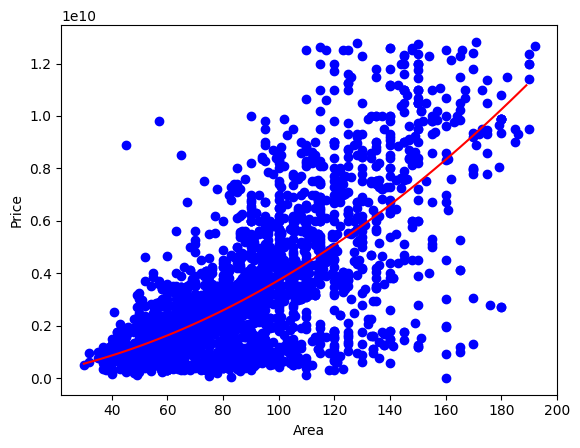

In [197]:
plt.scatter(train.Area, train.Price, color = 'blue')
xx = np.arange(30, 192, 3)
yy = reg.intercept_[0] + reg.coef_[0][1] * xx + reg.coef_[0][2] * np.power(xx, 2)
plt.plot(xx, yy, '-r')
plt.xlabel('Area')
plt.ylabel('Price')

In [198]:
test_x_poly = poly.fit_transform(test_x)
test_y_ = reg.predict(test_x_poly)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y, test_y_))

Mean absolute error: 1428418157.23
Residual sum of squares (MSE): 4079298782714295808.00
R2-score: 0.53
